### CNN with CBOW word2vec

### Preprocessing

In [ ]:
!pip install keras.utils

  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=21c61edcf5fda0241f8af29b8eecf676411142f5a39ed9815a86148d688c45c1
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


In [ ]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from keras.layers import Embedding

from keras.layers import Dense,Input,GlobalMaxPooling1D
from keras.layers import Conv1D,MaxPooling1D,Embedding
from keras.models import Model
from keras.layers import Input, Dense, Embedding, Conv2D, MaxPooling2D, Dropout,concatenate
from keras.layers.core import Reshape,Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD,RMSprop,Adagrad,Adadelta,Adam, Adamax, Nadam
from keras.models import Model
from keras import regularizers

import gensim
from gensim.models import Word2Vec

from gensim.models.keyedvectors import KeyedVectors

In [ ]:
import chardet
with open('/content/Segmented-Sentiments - Sheet1.csv', 'rb') as f:
    enc = chardet.detect(f.read())

In [ ]:
data = pd.read_csv('/content/Segmented-Sentiments - Sheet1.csv')
print(data.head())

   Index                                          Sentences Sentiment
0      0  အန်ဒရီယာ မာစီ သည် အီတလီ အတွက် စမ်းသပ်မှု တစ်ခု...  Positive
1      1  ပေါ်တူဂီ သည် ဘယ်သောအခါမှ စွန့်လွှတ်မှု မရှိခဲ့...  Positive
2      2  အီတလီ သည် ပထမပိုင်း ၌ ၁၆-၅ ဖြင့် ဦးဆောင်ခဲ့ သေ...  Positive
3      3  သို့သော်လည်း ဘော်တိုလပ်စီ သည် မော်ရို ဘာဂမ်မက်...  Positive
4      4  နယူးဇီလန် သည် ရမှတ် ကွာခြားချက် အပေါ် စကော့တလန...  Positive


In [ ]:
data['Sentences']

0       အန်ဒရီယာ မာစီ သည် အီတလီ အတွက် စမ်းသပ်မှု တစ်ခု...
1       ပေါ်တူဂီ သည် ဘယ်သောအခါမှ စွန့်လွှတ်မှု မရှိခဲ့...
2       အီတလီ သည် ပထမပိုင်း ၌ ၁၆-၅ ဖြင့် ဦးဆောင်ခဲ့ သေ...
3       သို့သော်လည်း ဘော်တိုလပ်စီ သည် မော်ရို ဘာဂမ်မက်...
4       နယူးဇီလန် သည် ရမှတ် ကွာခြားချက် အပေါ် စကော့တလန...
                              ...                        
6248    လက်ရှိ Miss Universe အလှမယ် အန်ဒရီယာမတ်ဇာကမူ A...
6249    တရုတ်နိုင်ငံ၌ ကျင်းပမည့် တင်းနစ်ပြိုင်ပွဲ အားလ...
6250    Red Notice ဇာတ်ကားအပေါ် ရုပ်ရှင် ဝေဖန်ရေးသမားမ...
6251    လက်ရှိ Miss Universe အလှမယ် အန်ဒရီယာမတ်ဇာကမူ A...
6252    တရုတ်နိုင်ငံ၌ ကျင်းပမည့် တင်းနစ်ပြိုင်ပွဲအားလု...
Name: Sentences, Length: 6253, dtype: object

In [ ]:
data.isnull().sum()

Index        0
Sentences    0
Sentiment    0
dtype: int64

In [ ]:
data = data.loc[data['Sentiment']!="Neutral"]

In [ ]:
data.shape

(5629, 3)

In [ ]:
j=0
for i in data['Sentiment']:
  if i == 'Negative':
    j += 1
print(j)

2117


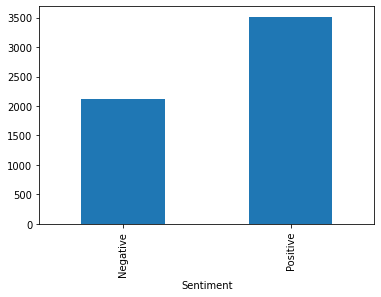

In [ ]:
data['category_id'] = data['Sentiment'].factorize()[0]
colslist = ['Index','Sentence', 'Sentiment', 'category_id']
data.columns = colslist
data.groupby('Sentiment').Index.count().plot.bar(ylim=0)

In [ ]:
stopwordslist = []
slist = []
with open("/content/stopword (1).txt", encoding = 'utf8') as stopwordsfile:
    stopwords = stopwordsfile.readlines()
    slist.extend(stopwords)
    for w in range(len(slist)):
        temp = slist[w]
        stopwordslist.append(temp.rstrip())

In [ ]:
import re
CleanPattern = re.compile(r'\d+|[၊။!-/:-@[-`{-~\t ]|[A-za-z0-9]')
def clean_sentence(sentence):
     sent = CleanPattern.sub(" ",sentence)
     return sent

def stop_word(sentence):
  new_sentence = []
  for word in sentence.split():
    if word not in stopwordslist:
      new_sentence.append(word)
  return(' '.join(new_sentence))

def process(line):
    line = clean_sentence(line)
    sentence = stop_word(line)
    return sentence

BreakPattern = re.compile(r'(?:(?<!္)([က-ဪဿ၊-၏]|[၀-၉]+|[^က-၏]+)(?![ှျ]?[့္်]))')

def sylbreak(sentence):
    line = BreakPattern.sub(" " + r"\1",sentence)
    return line

def process(sentence):
    line = clean_sentence(sentence)
    sentence = stop_word(line)
    return sentence

data['Sentence'] = data['Sentence'].apply(process)
data.head(10)

,Index,Sentence,Sentiment,category_id
0,0,အန်ဒရီယာ မာစီ အီတလီ စမ်းသပ်မှု တစ်ခု စတုတ္ထ မိ...,Positive,0
1,1,ပေါ်တူဂီ ဘယ်သောအခါမှ စွန့်လွှတ်မှု မရှိခဲ့ ဒေး...,Positive,0
2,2,အီတလီ ပထမပိုင်း ဖြင့် ဦးဆောင်ခဲ့ ပေါ်တူဂီ ဒုတိ...,Positive,0
3,3,သို့သော်လည်း ဘော်တိုလပ်စီ မော်ရို ဘာဂမ်မက်စကို...,Positive,0
4,4,နယူးဇီလန် ရမှတ် ကွာခြားချက် စကော့တလန်၏ ရှေ့မှ ...,Positive,0
5,5,အသေးစိတ်များကို မနေ့က ယူတီစီ အောက်လွှတ်တော် ဗြ...,Positive,0
6,6,လွှတ်တော်အမတ်များ သူမ၏ ကြေငြာချက် ရုသ်ကယ်လီ ပျ...,Positive,0
7,7,သူမသည် လုံခြုံရေးရာ ဆောင်ရွက်မှုများ ရယူခဲ့ကြေ...,Positive,0
8,8,လစ်ဘရယ် ဒီမိုကရက် ကိုယ်စားပြုထားသော ဆူဇန် ကရာမ...,Positive,0
9,9,လူးဝတ် ဆက်လက် မှတ်ချက်ပြုခဲ့သည် င်္သဘော အမှတ်အ...,Positive,0


In [ ]:
import os, re, csv, math, codecs
from tqdm import tqdm

In [ ]:
X = data['Sentence'].fillna('').tolist()
X = [str(i) for i in X]
y = np.array(data['category_id'])

In [ ]:
X[1200]

'ပြည်ထောင်စုဝန်ကြီး တိုင်းဒေသကြီး နှင့် ပြည်နယ်များ မှဝန်ကြီး နှင့် တတ်ရောက် လာသော ဧည့်သည်တော် နှင့် ဆုရ ရှိသည့် သမ္မတ နှုတ်ခွန်းဆက်သ'

In [ ]:
RANDOM_STATE = 42

text_train,text_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=RANDOM_STATE)

In [ ]:
#Set Maximum number of words to be embedded
NUM_WORDS = 20000

tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_train)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 21207 unique tokens.


In [ ]:
X_train = tokenizer.texts_to_sequences(text_train)
X_test = tokenizer.texts_to_sequences(text_test)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
maxlen = max(len(x) for x in X_train)//2 # longest text in train set

# Add pading to ensure all vectors have same dimensionality
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
maxlen

183

In [ ]:
y_train.shape

(4503,)

In [ ]:
vocab_size

21208

In [ ]:
print('Shape of X train and X test tensor:', X_train.shape,X_test.shape)
print('Shape of label train and test tensor:', y_train.shape,y_test.shape)

Shape of X train and X test tensor: (4503, 183) (1126, 183)
Shape of label train and test tensor: (4503,) (1126,)


In [ ]:
word_vectors = Word2Vec.load('/content/model1.bin')

In [ ]:
EMBEDDING_DIM = 32
vocabulary_size=min(len(word_index)+1,(NUM_WORDS))
embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))
for word, i in word_index.items():
    if i>=NUM_WORDS:
        continue
    try:
        embedding_vector = word_vectors.wv[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        vec = np.zeros(EMBEDDING_DIM)
        embedding_matrix[i]=vec

In [ ]:
embedding_matrix.shape

(20000, 32)

In [ ]:
#training params
batch_size = 500
#num_epochs = 10

#model parameters
num_filters = 64 
#embed_dim = 100 
weight_decay = 0.025

### Static

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Flatten
from tensorflow import keras
import tensorflow as tf 
#CNN architecture -static
print("training CNN ...")
model = Sequential()
model.add(Embedding(vocabulary_size, EMBEDDING_DIM,weights=[embedding_matrix], input_length=maxlen, trainable=True))
model.add(Dropout(0.2))

model.add(Conv1D(100, 3, activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(3))

model.add(Conv1D(100, 3, activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(3))

model.add(Conv1D(100, 3, activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(3))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Dense(1, activation='sigmoid'))  
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=["accuracy",keras.metrics.Precision(),keras.metrics.Recall()])
model.summary()

training CNN ...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 183, 32)           640000    
                                                                 
 dropout (Dropout)           (None, 183, 32)           0         
                                                                 
 conv1d (Conv1D)             (None, 183, 100)          9700      
                                                                 
 dropout_1 (Dropout)         (None, 183, 100)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 61, 100)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 61, 100)           30100     
                                       

In [ ]:
from keras.callbacks import EarlyStopping
#define callbacks
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=15, verbose=1)
callbacks_list = [early_stopping]
#model training
hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=150, callbacks=callbacks_list, validation_split=0.1, shuffle=True, verbose=2)

Epoch 1/150
11/11 - 6s - loss: 6.5259 - accuracy: 0.6024 - precision: 0.4130 - recall: 0.1159 - val_loss: 5.1151 - val_accuracy: 0.6297 - val_precision: 0.6111 - val_recall: 0.0643 - 6s/epoch - 534ms/step
Epoch 2/150
11/11 - 0s - loss: 4.4919 - accuracy: 0.6774 - precision: 0.5995 - recall: 0.4492 - val_loss: 3.7676 - val_accuracy: 0.6962 - val_precision: 0.5702 - val_recall: 0.8070 - 455ms/epoch - 41ms/step
Epoch 3/150
11/11 - 0s - loss: 3.3025 - accuracy: 0.7142 - precision: 0.6199 - recall: 0.6361 - val_loss: 2.7838 - val_accuracy: 0.7184 - val_precision: 0.6864 - val_recall: 0.4737 - 450ms/epoch - 41ms/step
Epoch 4/150
11/11 - 0s - loss: 2.4732 - accuracy: 0.7194 - precision: 0.6267 - recall: 0.6426 - val_loss: 2.1176 - val_accuracy: 0.7007 - val_precision: 0.5726 - val_recall: 0.8304 - 450ms/epoch - 41ms/step
Epoch 5/150
11/11 - 0s - loss: 1.8654 - accuracy: 0.7216 - precision: 0.6193 - recall: 0.6895 - val_loss: 1.6103 - val_accuracy: 0.7095 - val_precision: 0.7273 - val_recall: 

In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


In [ ]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
print('Loss', loss)
print('Accuracy', accuracy)
print('Precision', precision)
print('Recall', recall)

f1_score = (2* recall*precision)/(recall+precision)
print("f1_score", f1_score)

Loss 0.5208331942558289
Accuracy 0.7690941095352173
Precision 0.6404494643211365
Recall 0.8341463208198547
f1_score 0.7245762801138664


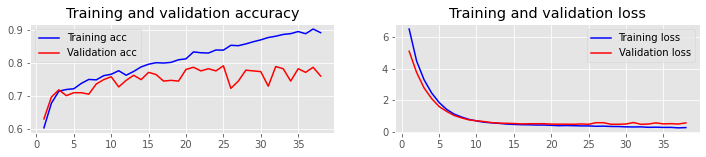

In [ ]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 2))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(hist)

### Non-Static

In [ ]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Flatten
from tensorflow import keras
import tensorflow as tf 
#CNN architecture -static
print("training CNN ...")
model1 = Sequential()
model1.add(Embedding(vocabulary_size,EMBEDDING_DIM,weights=[embedding_matrix], input_length=maxlen, trainable=False))
model1.add(Dropout(0.2))

model1.add(Conv1D(100, 3, activation='relu', padding='same'))
model1.add(Dropout(0.2))
model1.add(MaxPooling1D(3))

model1.add(Conv1D(100, 4, activation='relu', padding='same'))
model1.add(Dropout(0.2))
model1.add(MaxPooling1D(3))

model1.add(Conv1D(100, 5, activation='relu', padding='same'))
model1.add(Dropout(0.2))
model1.add(MaxPooling1D(3))

model1.add(Flatten())
model1.add(Dropout(0.2))
model1.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model1.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model1.add(Dense(1, activation='sigmoid'))  
model1.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=["accuracy",keras.metrics.Precision(),keras.metrics.Recall()])
model1.summary()

training CNN ...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 183, 32)           640000    
                                                                 
 dropout_5 (Dropout)         (None, 183, 32)           0         
                                                                 
 conv1d_3 (Conv1D)           (None, 183, 100)          9700      
                                                                 
 dropout_6 (Dropout)         (None, 183, 100)          0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 61, 100)          0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 61, 100)           40100     
                                     

In [ ]:
from keras.callbacks import EarlyStopping
#define callbacks
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=15, verbose=1)
callbacks_list = [early_stopping]
#model training
hist1 = model1.fit(X_train, y_train, batch_size=batch_size, epochs=150, callbacks=callbacks_list, validation_split=0.1, shuffle=True, verbose=2)

Epoch 1/100
11/11 - 4s - loss: 6.5338 - accuracy: 0.5970 - precision_1: 0.4241 - recall_1: 0.1764 - val_loss: 5.1708 - val_accuracy: 0.6763 - val_precision_1: 0.5628 - val_recall_1: 0.6550 - 4s/epoch - 348ms/step
Epoch 2/100
11/11 - 0s - loss: 4.5264 - accuracy: 0.6703 - precision_1: 0.6053 - recall_1: 0.3743 - val_loss: 3.7567 - val_accuracy: 0.6984 - val_precision_1: 0.6804 - val_recall_1: 0.3860 - 418ms/epoch - 38ms/step
Epoch 3/100
11/11 - 0s - loss: 3.3328 - accuracy: 0.7093 - precision_1: 0.6213 - recall_1: 0.5970 - val_loss: 2.8129 - val_accuracy: 0.7140 - val_precision_1: 0.5946 - val_recall_1: 0.7719 - 433ms/epoch - 39ms/step
Epoch 4/100
11/11 - 0s - loss: 2.5035 - accuracy: 0.7142 - precision_1: 0.6181 - recall_1: 0.6439 - val_loss: 2.1670 - val_accuracy: 0.7051 - val_precision_1: 0.5683 - val_recall_1: 0.9240 - 417ms/epoch - 38ms/step
Epoch 5/100
11/11 - 0s - loss: 1.8917 - accuracy: 0.7142 - precision_1: 0.6079 - recall_1: 0.6934 - val_loss: 1.6160 - val_accuracy: 0.7162 - 

In [ ]:
loss, accuracy, precision, recall = model1.evaluate(X_test, y_test, verbose=0)
print('Loss', loss)
print('Accuracy', accuracy)
print('Precision', precision)
print('Recall', recall)

f1_score = (2* recall*precision)/(recall+precision)
print("f1_score", f1_score)

Loss 0.5072347521781921
Accuracy 0.741563081741333
Precision 0.6133333444595337
Recall 0.785365879535675
f1_score 0.6887700704432062


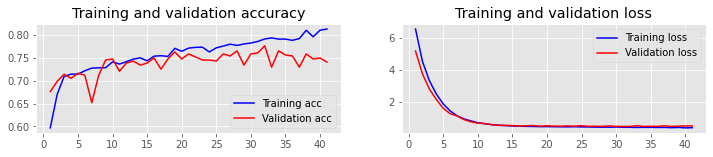

In [ ]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 2))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(hist1)

### CNN-rand

In [ ]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Flatten
from tensorflow import keras
import tensorflow as tf 
#CNN architecture -static
print("training CNN ...")
model2 = Sequential()
model2.add(Embedding(vocabulary_size,EMBEDDING_DIM, input_length=maxlen, trainable=True))
model2.add(Dropout(0.4))

model2.add(Conv1D(64, 3, activation='relu', padding='same'))
model2.add(Dropout(0.4))
model2.add(MaxPooling1D(3))

model2.add(Conv1D(64, 3, activation='relu', padding='same'))
model2.add(Dropout(0.4))
model2.add(MaxPooling1D(3))

model2.add(Conv1D(64, 3, activation='relu', padding='same'))
model2.add(Dropout(0.4))
model2.add(MaxPooling1D(3))

model2.add(Flatten())
model2.add(Dropout(0.4))
model2.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(Dense(1, activation='sigmoid'))
#opt = Adam(lr=1e-3)
#model2.compile(loss='binary_crossentropy',optimizer=opt,metrics=["accuracy",keras.metrics.Precision(),keras.metrics.Recall()])
model2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=["accuracy",keras.metrics.Precision(),keras.metrics.Recall()])
model2.summary()

training CNN ...
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 183, 32)           640000    
                                                                 
 dropout_10 (Dropout)        (None, 183, 32)           0         
                                                                 
 conv1d_6 (Conv1D)           (None, 183, 64)           6208      
                                                                 
 dropout_11 (Dropout)        (None, 183, 64)           0         
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 61, 64)           0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 61, 64)            12352     
                                     

In [ ]:
from keras.callbacks import EarlyStopping
#define callbacks
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=15, verbose=1)
callbacks_list = [early_stopping]
#model training
hist2 = model2.fit(X_train, y_train, batch_size=500, epochs=150, callbacks=callbacks_list, validation_split=0.1, shuffle=True, verbose=2)

Epoch 1/200
9/9 - 1s - loss: 0.0276 - accuracy: 0.9857 - precision_2: 0.9868 - recall_2: 0.9753 - val_loss: 0.6160 - val_accuracy: 0.7827 - val_precision_2: 0.6995 - val_recall_2: 0.7485 - 524ms/epoch - 58ms/step
Epoch 2/200
9/9 - 0s - loss: 0.0261 - accuracy: 0.9849 - precision_2: 0.9842 - recall_2: 0.9759 - val_loss: 0.5723 - val_accuracy: 0.7805 - val_precision_2: 0.6895 - val_recall_2: 0.7661 - 407ms/epoch - 45ms/step
Epoch 3/200
9/9 - 0s - loss: 0.0257 - accuracy: 0.9849 - precision_2: 0.9874 - recall_2: 0.9727 - val_loss: 0.5655 - val_accuracy: 0.7627 - val_precision_2: 0.7025 - val_recall_2: 0.6491 - 330ms/epoch - 37ms/step
Epoch 4/200
9/9 - 0s - loss: 0.0264 - accuracy: 0.9845 - precision_2: 0.9874 - recall_2: 0.9714 - val_loss: 0.7162 - val_accuracy: 0.7805 - val_precision_2: 0.6915 - val_recall_2: 0.7602 - 310ms/epoch - 34ms/step
Epoch 5/200
9/9 - 0s - loss: 0.0267 - accuracy: 0.9852 - precision_2: 0.9862 - recall_2: 0.9746 - val_loss: 0.8407 - val_accuracy: 0.7517 - val_prec

In [ ]:
loss, accuracy, precision, recall = model2.evaluate(X_test, y_test, verbose=0)
print('Loss', loss)
print('Accuracy', accuracy)
print('Precision', precision)
print('Recall', recall)

f1_score = (2* recall*precision)/(recall+precision)
print("f1_score", f1_score)

Loss 0.6503796577453613
Accuracy 0.7895204424858093
Precision 0.7258485555648804
Recall 0.6780487895011902
f1_score 0.7011349315412977


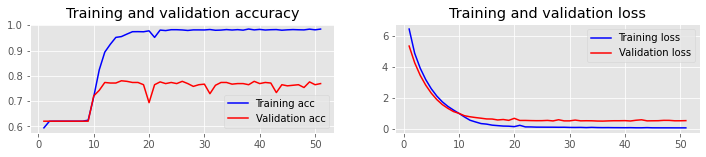

In [ ]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 2))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(hist2)

### MultiChannel

In [ ]:
import tensorflow as tf 
from pickle import load
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding, GlobalMaxPooling1D
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate

from tensorflow import keras
import tensorflow as tf 


In [ ]:
from keras.layers import Input

inputs1 = Input(shape=(maxlen,))

# channel 1
embedding1 = Embedding(vocabulary_size, 32, weights=[embedding_matrix],trainable = True)(inputs1)

drop = Dropout(0.2)(embedding1)

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(drop)
drop1 = Dropout(0.2)(conv1)
pool1 = MaxPooling1D(pool_size=3)(drop1)

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(pool1)
drop1 = Dropout(0.2)(conv1)
pool1 = MaxPooling1D(pool_size=3)(drop1)

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(pool1)
drop1 = Dropout(0.2)(conv1)
pool1 = MaxPooling1D(pool_size=3)(drop1)
flat1 = Flatten()(pool1)

In [ ]:
from keras.layers import Input

# channel 2
embedding2 = Embedding(vocabulary_size, 32, weights=[embedding_matrix],trainable = False)(inputs1)

drop = Dropout(0.2)(embedding2)

conv2 = Conv1D(filters=64, kernel_size=3, activation='relu')(drop)
drop2 = Dropout(0.2)(conv2)
pool2 = MaxPooling1D(pool_size=3)(drop2)

conv2 = Conv1D(filters=64, kernel_size=3, activation='relu')(pool2)
drop2 = Dropout(0.2)(conv2)
pool2 = MaxPooling1D(pool_size=3)(drop2)

conv2 = Conv1D(filters=64, kernel_size=3, activation='relu')(pool2)
drop2 = Dropout(0.2)(conv2)
pool2 = MaxPooling1D(pool_size=3)(drop2)
flat2 = Flatten()(pool2)

In [ ]:
merged = concatenate([flat1, flat2])

# interpretation
drop2 = Dropout(0.2)(merged)
dense1 = Dense(128, activation='relu',kernel_regularizer=regularizers.l2(weight_decay))(drop2)
dense2 = Dense(64, activation='relu',kernel_regularizer=regularizers.l2(weight_decay))(dense1)
outputs = Dense(1, activation='sigmoid')(dense2)

model3 = Model(inputs=inputs1, outputs=outputs)

# compile
model3.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=["accuracy",keras.metrics.Precision(),keras.metrics.Recall()])
# summarize
print(model3.summary())

#plot_model(model, show_shapes=True, to_file='multichannel.png')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 183)]        0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 183, 32)      640000      ['input_1[0][0]']                
                                                                                                  
 embedding_4 (Embedding)        (None, 183, 32)      640000      ['input_1[0][0]']                
                                                                                                  
 dropout_15 (Dropout)           (None, 183, 32)      0           ['embedding_3[0][0]']            
                                                                                              

In [ ]:
from keras.callbacks import EarlyStopping
#define callbacks
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=15, verbose=1)
callbacks_list = [early_stopping]
#model training
hist3 = model3.fit(X_train, y_train, batch_size=batch_size, epochs=100, callbacks=callbacks_list, validation_split=0.1, shuffle=True, verbose=2)

Epoch 1/100
11/11 - 5s - loss: 6.5371 - accuracy: 0.5943 - precision_3: 0.4094 - recall_3: 0.1589 - val_loss: 5.0879 - val_accuracy: 0.6253 - val_precision_3: 0.6000 - val_recall_3: 0.0351 - 5s/epoch - 449ms/step
Epoch 2/100
11/11 - 1s - loss: 4.4835 - accuracy: 0.6683 - precision_3: 0.6034 - recall_3: 0.3646 - val_loss: 3.7282 - val_accuracy: 0.7339 - val_precision_3: 0.6076 - val_recall_3: 0.8421 - 501ms/epoch - 46ms/step
Epoch 3/100
11/11 - 1s - loss: 3.2909 - accuracy: 0.7125 - precision_3: 0.6287 - recall_3: 0.5898 - val_loss: 2.7511 - val_accuracy: 0.6984 - val_precision_3: 0.5888 - val_recall_3: 0.6784 - 503ms/epoch - 46ms/step
Epoch 4/100
11/11 - 1s - loss: 2.4568 - accuracy: 0.7080 - precision_3: 0.6074 - recall_3: 0.6497 - val_loss: 2.0947 - val_accuracy: 0.7251 - val_precision_3: 0.5944 - val_recall_3: 0.8655 - 514ms/epoch - 47ms/step
Epoch 5/100
11/11 - 0s - loss: 1.8648 - accuracy: 0.7125 - precision_3: 0.6128 - recall_3: 0.6562 - val_loss: 1.5913 - val_accuracy: 0.7184 - 

In [ ]:
loss, accuracy, precision, recall = model3.evaluate(X_test, y_test, verbose=0)
print('Loss', loss)
print('Accuracy', accuracy)
print('Precision', precision)
print('Recall', recall)

f1_score = (2* recall*precision)/(recall+precision)
print("f1_score", f1_score)

Loss 0.534087061882019
Accuracy 0.7637655138969421
Precision 0.751748263835907
Recall 0.5243902206420898
f1_score 0.6178160798927245


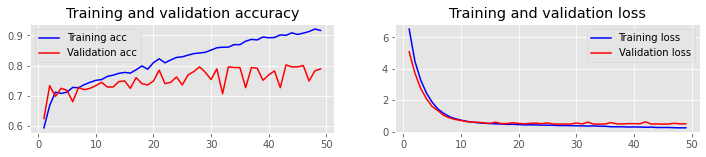

In [ ]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 2))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(hist3)

In [ ]:
embedding_layer = Embedding(vocabulary_size,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            trainable=True)